In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB,GaussianNB
from sklearn.utils.extmath import density
from sklearn import metrics
import seaborn as sns
import pandas as pd
from sklearn import metrics

In [2]:
data = pd.read_csv(r'C:\Users\OLAMIDE\Desktop\MACHINE_LEARNING_PROJECTS\Qualitative_Bankruptcy.csv',header=None)
columns_names = ['Industrial Risk','Management Risk', 'Financial Flexibility', 'Credibility','Competitiveness',
               'Operating Risk','Class']
data.columns = columns_names

In [3]:
b = []
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in data[columns_names]:
    i = data[i]
    i_encoded = encoder.fit_transform(i)
    b.append(i_encoded)
new_data = pd.DataFrame(b)
encoded_data = new_data.transpose()
encoded_data.columns = columns_names

In [4]:
features = encoded_data.drop('Class', axis=1)
Class = encoded_data['Class']

In [5]:
from sklearn.model_selection import train_test_split
featurestrain, featurestest, Classtrain, Classtest = train_test_split(features,Class,
                                                random_state=1)

In [6]:
def benchmark(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    clf.fit(featurestrain, Classtrain)
    
    Class_model = clf.predict(featurestest)
    
    predicted = clf.predict([[2,2,0,0,0,2]])
    print("Predicted Value:", predicted)

    score = metrics.accuracy_score(Classtest, Class_model)
    print("accuracy:   %0.3f" % score)
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score

results = []

print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))
results.append(benchmark(GaussianNB()))



Naive Bayes
________________________________________________________________________________
Training: 
MultinomialNB(alpha=0.01)
Predicted Value: [1]
accuracy:   0.508
________________________________________________________________________________
Training: 
BernoulliNB(alpha=0.01)
Predicted Value: [1]
accuracy:   0.794
________________________________________________________________________________
Training: 
ComplementNB(alpha=0.1)
Predicted Value: [0]
accuracy:   0.587
________________________________________________________________________________
Training: 
GaussianNB()
Predicted Value: [1]
accuracy:   0.984


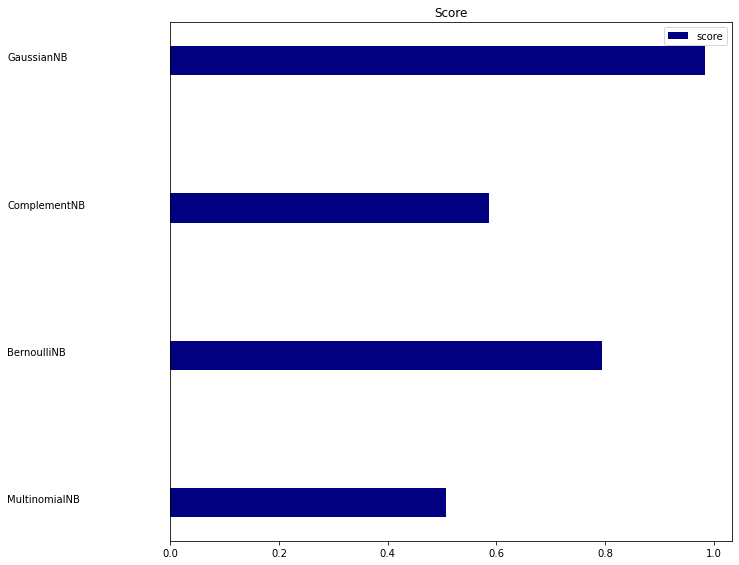

In [7]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(2)]

clf_names,score = results


plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices,score, .2, label="score", color='navy')

plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

therefore GAUSSIANNB WILL BE DEPLOYED AS OUR GENERATIVE MODEL UNDER CLASSIFICATION